# Calculating probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by
 
* Count the number of deals Amir worked on for each product type using .value_counts() and store in counts.
* Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.



In [1]:
import pandas as pd

amazon = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [2]:
amazon.shape

(1465, 16)

In [3]:
# Count the deals for each product
counts = amazon['actual_price'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amazon.shape[0]

print(probs)

actual_price
₹999      0.081911
₹499      0.048464
₹1,999    0.038225
₹1,499    0.025256
₹399      0.023208
            ...   
₹931      0.000683
₹3,599    0.000683
₹420      0.000683
₹9,625    0.000683
₹3,690    0.000683
Name: count, Length: 449, dtype: float64


**Sampling deals**

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.


* Set the random seed to 24.
* Take a sample of 5 deals without replacement and store them as sample_without_replacement.
* Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [4]:
import numpy as np

# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amazon.sample(5, replace = False)
print(sample_without_replacement)

      product_id                                       product_name  \
117   B08RP2L2NL  King Shine Multi Retractable 3.0A Fast Charger...   
350   B09XB8GFBQ  Redmi 10A (Charcoal Black, 4GB RAM, 64GB Stora...   
925   B0B4DT8MKT  Wecool Unbreakable 3 in 1 Charging Cable with ...   
763   B07BRKK9JQ  Zebronics Zeb-Transformer Gaming Keyboard and ...   
1382  B07TTSS5MP  Lifelong LLMG74 750 Watt Mixer Grinder with 3 ...   

                                               category discounted_price  \
117   Computers&Accessories|Accessories&Peripherals|...             ₹347   
350   Electronics|Mobiles&Accessories|Smartphones&Ba...           ₹8,999   
925   Computers&Accessories|Accessories&Peripherals|...             ₹348   
763   Computers&Accessories|Accessories&Peripherals|...           ₹1,299   
1382  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹1,799   

     actual_price discount_percentage rating rating_count  \
117          ₹999                 65%    3.5        1,1

In [5]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_without_replacement = amazon.sample(5, replace = True)
print(sample_without_replacement)

      product_id                                       product_name  \
418   B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
899   B0814ZY6FP  Zebronics ZEB-VITA Wireless Bluetooth 10W Port...   
192   B0B15GSPQW  Samsung 138 cm (55 inches) Crystal 4K Neo Seri...   
343   B0BDRVFDKP  SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...   
1425  B081RLM75M      LACOPINE Mini Pocket Size Lint Roller (White)   

                                               category discounted_price  \
418   Computers&Accessories|Accessories&Peripherals|...          ₹176.63   
899    Electronics|HomeAudio|Speakers|BluetoothSpeakers             ₹899   
192   Electronics|HomeTheater,TV&Video|Televisions|S...          ₹47,990   
343         Electronics|Accessories|MemoryCards|MicroSD             ₹569   
1425  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...             ₹369   

     actual_price discount_percentage rating rating_count  \
418          ₹499                 65%    4.1       15,1

Spectactular sampling! It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.

# Data back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.


* To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.
* Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.
* Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.
* Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20

In [6]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [7]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 -  uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


In [8]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


Wonderful wait-time calculations! There's a 33% chance that Amir will wait 10-20 minutes. In the next exercise, you'll make sure this calculation holds up by simulating some wait times.

**Simulating wait times**

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.



* Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.

In [9]:
import matplotlib.pyplot as plt

# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size = 1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

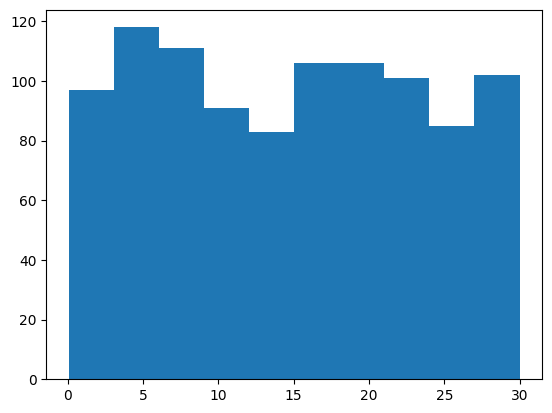

In [10]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

Superb simulating! Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

# Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.


* Import binom from scipy.stats and set the random seed to 10.
* Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
* Simulate a typical week of Amir's deals, or one week of 3 deals.
* Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
* Print the mean number of deals he won per week.

In [11]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


In [12]:
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size = 1))

[0]


In [14]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3,size = 52)

print(deals)
# Print mean deals won per week
print(deals.mean())

[1 2 3 1 2 0 1 2 1 1 0 1 0 0 0 1 0 1 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0 1 1 1
 0 0 3 0 1 3 1 0 1 1 2 0 1 1 1]
0.8846153846153846


Brilliant binomial simulation! In this simulated year, Amir won 0.88 deals on average each week.

**Calculating binomial probabilities**

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.


* What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.
* What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.
* What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

In [15]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


In [16]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [17]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


Powerful probability calculations! Amir has about a 22% chance of closing more than one deal in a week.

**How many sales will be won?**

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by 
.


* Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [18]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct =3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


Excellent expectation experimentation! If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.